In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
import seaborn as sns

In [130]:
df = pd.read_csv('datasets/voice.csv')

In [131]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [132]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


<Axes: >

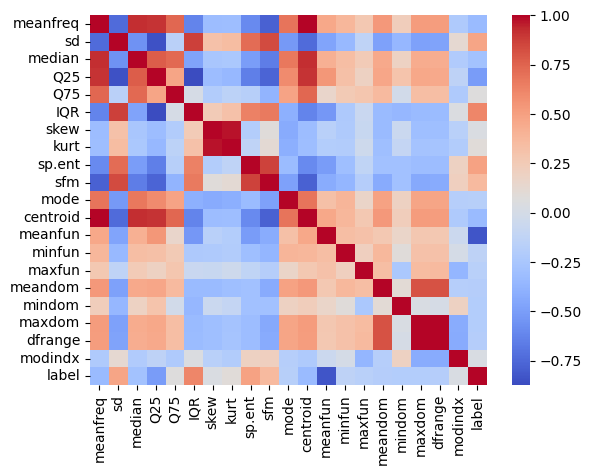

In [133]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [134]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [136]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [137]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[261  36]
 [ 11 326]]


0.9258675078864353

In [138]:
# Calculate the correlation matrix
corr = df.iloc[:,:-1].corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the correlation coefficient threshold
threshold = 0.70

# Filter the correlation matrix
corr_filtered = corr.where(~mask)

# Drop columns from the DataFrame with correlation coefficient above the threshold
columns_to_drop = [column for column in corr_filtered.columns if any(corr_filtered[column] > threshold)]

In [139]:
corr_filtered

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sd,-0.739039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median,0.925445,-0.562603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q25,0.911416,-0.846931,0.774922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q75,0.740997,-0.161076,0.731849,0.477140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
columns_to_drop

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'skew',
 'sp.ent',
 'meandom',
 'maxdom']

In [141]:
df = df.drop(columns_to_drop, axis=1)

In [142]:
df.head()

,IQR,kurt,sfm,mode,centroid,meanfun,minfun,maxfun,mindom,dfrange,modindx,label
0,0.075122,274.402906,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.000000,0.000000,1
1,0.073252,634.613855,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.007812,0.046875,0.052632,1
2,0.123207,1024.927705,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007812,0.007812,0.046512,1
3,0.111374,4.177296,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.007812,0.554688,0.247119,1
4,0.127325,4.333713,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.007812,5.476562,0.208274,1


In [143]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [145]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [146]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[256  41]
 [ 14 323]]


0.9132492113564669